In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [8]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 2.0) & (games_df['odds_open_tb25'] <= 2.5)
]

Count: 4795
Open profit: 2.289999999999992
Close profit: -75.28000000000003
Open ROI: 0.00047758081334723507
Close ROI: -0.015699687174139734
UDI: 0.013241991026005649
AxesSubplot(0.125,0.125;0.775x0.755)


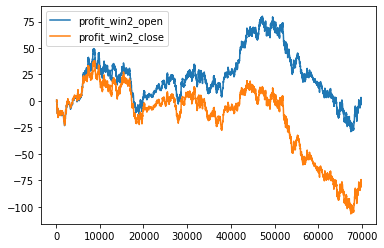

In [9]:
utils.print_away_win_result(segmented_df)

In [13]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference,0.099255
expected_difference_loc,0.082747
simple_expected_difference,0.059199
simple_expected_difference_loc,0.042330
expected_total_loc,-0.019312
simple_expected_total_value,0.013740
simple_expected_total_value_loc,-0.006296
expected_total,-0.001441


In [14]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.283983,-0.500470,0.216487
expected_difference,-0.253157,-0.462891,0.209734
simple_expected_difference,-0.262436,-0.378378,0.115942
simple_expected_difference_loc,-0.056134,-0.169077,0.112942
expected_total_loc,2.193004,2.271890,0.078886
expected_total,2.184529,2.258908,0.074379
simple_expected_total_value,4.563078,4.634696,0.071618
simple_expected_total_value_loc,4.509960,4.560529,0.050569


In [10]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.46) & (segmented_df['expected_difference'] <= -0.49)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win2')

,low,high,diff
expected_difference,-0.768694,-0.828420,0.059726
expected_difference_loc,-0.952950,-0.995848,0.042898


Count: 109
Open profit: 13.479999999999997
Close profit: 9.740000000000002
Open ROI: 0.12366972477064217
Close ROI: 0.08935779816513763
UDI: 0.0370341009704787
AxesSubplot(0.125,0.125;0.775x0.755)


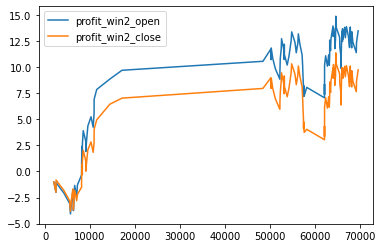

In [11]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference'] <= -0.83) & (segmented_df['expected_difference_loc'] <= -0.99)
]
utils.print_away_win_result(filtered_result_df)